In [2]:
# In terminal: pip install afinn
from afinn import Afinn

### Basic AFINN

In [3]:
afinn = Afinn()

In [4]:
afinn.score('This is utterly excellent!')

3.0

In [5]:
afinn.score('I saw that yesterday!')

0.0

In [6]:
afinn.score('I saw that yesterday! :)')

0.0

In [7]:
afinn.score('I saw that yesterday! :( ')

0.0

### Sensitive to Emoticons

In [8]:
afinn_emo = Afinn(emoticons=True)

In [9]:
afinn_emo.score('I saw that yesterday :)')

2.0

In [10]:
afinn_emo.score('I saw that yesterday :(((')

-3.0

In [11]:
afinn_emo.score('This is utterly excellent!')

3.0

### Example with Twitter Sentiment Analysis

In [12]:
import numpy as np
import pandas as pd

In [13]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)

In [14]:
#path = 'https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv'
path = '../BT5153_data/text_emotion.csv'
df = pd.read_csv(path)

In [15]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [16]:
afinn = Afinn()
afinn_scores = [afinn.score(text) for text in df.content]

In [17]:
df['afinn'] = afinn_scores
df[['sentiment', 'afinn', 'content']].head(10)

,sentiment,afinn,content
0,empty,-3.0,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,-2.0,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,-3.0,Funeral ceremony...gloomy friday...
3,enthusiasm,0.0,wants to hang out with friends SOON!
4,neutral,0.0,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
5,worry,2.0,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends
6,sadness,-3.0,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
7,worry,0.0,Hmmm. http://www.djhero.com/ is down
8,sadness,1.0,@charviray Charlene my love. I miss you
9,sadness,-1.0,@kelcouch I'm sorry at least it's Friday?


In [18]:
df.sentiment.head()

0    empty     
1    sadness   
2    sadness   
3    enthusiasm
4    neutral   
Name: sentiment, dtype: object

In [19]:
df.afinn.head()

0   -3.0
1   -2.0
2   -3.0
3    0.0
4    0.0
Name: afinn, dtype: float64

In [20]:
# Unique values in the column "sentiment"
df.sentiment.value_counts().sort_index()

anger         110 
boredom       179 
empty         827 
enthusiasm    759 
fun           1776
happiness     5209
hate          1323
love          3842
neutral       8638
relief        1526
sadness       5165
surprise      2187
worry         8459
Name: sentiment, dtype: int64

### `pd.crosstab`: Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

More info: [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

In [21]:
crosstab = pd.crosstab(df.sentiment, df.afinn)
crosstab

afinn,-18.0,-17.0,-15.0,-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0,20.0,21.0
sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anger,0,0,0,0,0,0,0,0,0,1,3,0,1,8,7,16,7,37,6,9,6,2,1,1,2,1,0,1,1,0,0,0,0,0,0,0,0,0
boredom,0,0,0,1,0,0,1,0,1,0,3,4,7,10,18,37,12,50,14,8,6,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
empty,0,0,0,0,0,0,1,0,1,5,6,6,7,22,38,103,63,374,49,58,54,17,9,5,3,3,1,0,2,0,0,0,0,0,0,0,0,0
enthusiasm,0,0,0,0,0,0,0,0,0,1,1,2,4,8,16,39,41,267,81,95,78,38,40,23,10,5,2,4,2,1,0,1,0,0,0,0,0,0
fun,0,0,0,0,0,0,0,0,0,0,2,6,5,19,25,51,79,466,158,174,255,184,94,87,75,39,18,16,8,8,3,2,2,0,0,0,0,0
happiness,0,0,0,0,0,0,1,0,1,2,5,3,9,23,41,106,128,1122,337,629,1066,480,332,353,217,121,85,52,42,22,13,11,4,3,0,0,0,1
hate,1,0,0,1,3,3,3,9,13,18,29,69,75,127,244,149,95,270,71,48,54,16,5,10,4,3,1,0,1,1,0,0,0,0,0,0,0,0
love,0,0,1,0,0,0,0,0,0,2,2,6,5,11,44,95,68,532,216,442,950,287,307,313,183,124,105,52,23,31,19,10,7,2,2,1,2,0
neutral,0,1,0,0,1,1,1,0,3,4,8,17,42,89,241,487,501,4285,694,787,713,298,192,125,58,34,26,16,7,5,1,1,0,0,0,0,0,0


In [22]:
# Normalizing a pandas DataFrame by row
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized

afinn,-18.0,-17.0,-15.0,-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0,20.0,21.0
sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anger,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009091,0.027273,0.000000,0.009091,0.072727,0.063636,0.145455,0.063636,0.336364,0.054545,0.081818,0.054545,0.018182,0.009091,0.009091,0.018182,0.009091,0.000000,0.009091,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
boredom,0.000000,0.000000,0.000000,0.005587,0.000000,0.000000,0.005587,0.000000,0.005587,0.000000,0.016760,0.022346,0.039106,0.055866,0.100559,0.206704,0.067039,0.279330,0.078212,0.044693,0.033520,0.022346,0.011173,0.000000,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
empty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001209,0.000000,0.001209,0.006046,0.007255,0.007255,0.008464,0.026602,0.045949,0.124547,0.076179,0.452237,0.059250,0.070133,0.065296,0.020556,0.010883,0.006046,0.003628,0.003628,0.001209,0.000000,0.002418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
enthusiasm,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001318,0.001318,0.002635,0.005270,0.010540,0.021080,0.051383,0.054018,0.351779,0.106719,0.125165,0.102767,0.050066,0.052701,0.030303,0.013175,0.006588,0.002635,0.005270,0.002635,0.001318,0.000000,0.001318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001126,0.003378,0.002815,0.010698,0.014077,0.028716,0.044482,0.262387,0.088964,0.097973,0.143581,0.103604,0.052928,0.048986,0.042230,0.021959,0.010135,0.009009,0.004505,0.004505,0.001689,0.001126,0.001126,0.000000,0.000000,0.000000,0.000000,0.000000
happiness,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000192,0.000000,0.000192,0.000384,0.000960,0.000576,0.001728,0.004415,0.007871,0.020349,0.024573,0.215396,0.064696,0.120753,0.204646,0.092148,0.063736,0.067767,0.041659,0.023229,0.016318,0.009983,0.008063,0.004223,0.002496,0.002112,0.000768,0.000576,0.000000,0.000000,0.000000,0.000192
hate,0.000756,0.000000,0.000000,0.000756,0.002268,0.002268,0.002268,0.006803,0.009826,0.013605,0.021920,0.052154,0.056689,0.095994,0.184429,0.112623,0.071807,0.204082,0.053666,0.036281,0.040816,0.012094,0.003779,0.007559,0.003023,0.002268,0.000756,0.000000,0.000756,0.000756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
love,0.000000,0.000000,0.000260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000521,0.000521,0.001562,0.001301,0.002863,0.011452,0.024727,0.017699,0.138470,0.056221,0.115044,0.247267,0.074701,0.079906,0.081468,0.047631,0.032275,0.027330,0.013535,0.005986,0.008069,0.004945,0.002603,0.001822,0.000521,0.000521,0.000260,0.000521,0.000000
neutral,0.000000,0.000116,0.000000,0.000000,0.000116,0.000116,0.000116,0.000000,0.000347,0.000463,0.000926,0.001968,0.004862,0.010303,0.027900,0.056379,0.058000,0.496064,0.080343,0.091109,0.082542,0.034499,0.022227,0.014471,0.006715,0.003936,0.003010,0.001852,0.000810,0.000579,0.000116,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

Colormap references: https://matplotlib.org/examples/color/colormaps_reference.html

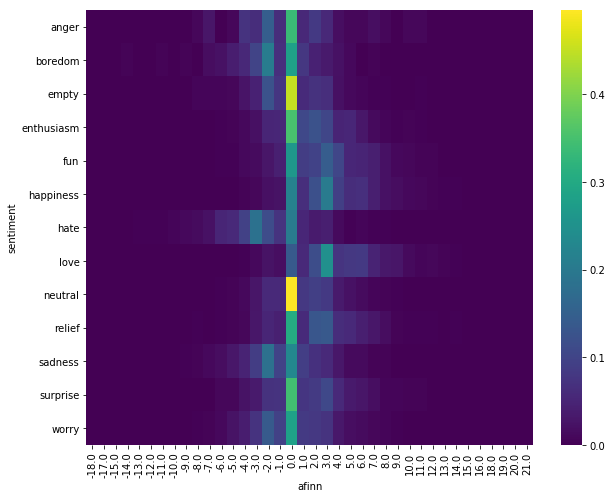

In [24]:
fig, ax = pyplot.subplots(figsize=(10, 8))
# sns.heatmap(crosstab_normalized, annot=False, cmap="YlGnBu", ax=ax)
sns.heatmap(crosstab_normalized, annot=False, cmap="viridis", ax=ax)

# More Resources

- [AFINN (Github)](https://github.com/fnielsen/afinn/tree/master/notebooks)